# Modules

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

from scipy.stats import exponweib
from scipy.stats import levy_stable

# Classes

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## About RVS (Random Value Sample) and Histogram

In [ ]:
# Parámetros de la distribución
a = 2.89
c = 1.95

# Resolution
resolution = 200
aux_domain = np.linspace(0, 3, resolution)

#Weibull probability density function
exponweib_pdf = np.array([
    exponweib.pdf(i, a, c) for i in aux_domain
])

In [ ]:
fif_exponweib_pdf = go.Figure()

fif_exponweib_pdf.add_trace(go.Scatter(
    x = aux_domain,
    y = exponweib_pdf,
    marker = dict( size = 2 ),
    line = dict( width = 2 ),
    name = 'Weibull',
    showlegend = True,
))

In [ ]:
sample_size = 100
r = exponweib.rvs(a, c, size = sample_size)

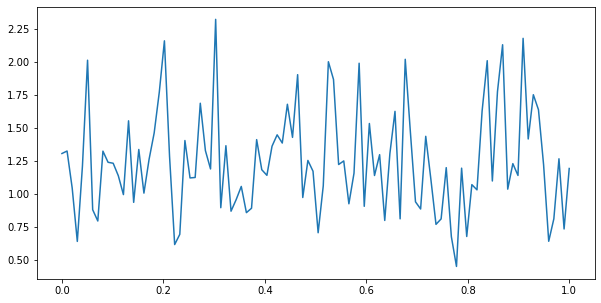

In [ ]:
aux_vector = np.linspace(0, 1, sample_size)
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.plot(aux_vector, r)

## Weibull Histogram

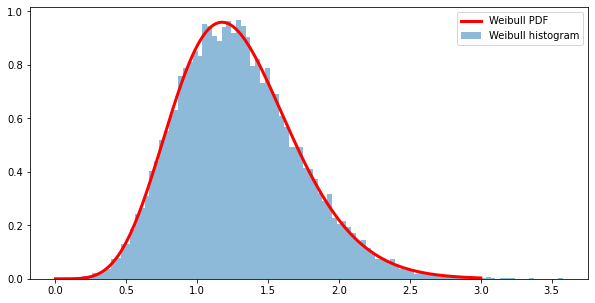

In [ ]:
sample_size = 20000
r = exponweib.rvs(a, c, size = sample_size)

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.5, label="Weibull histogram")

ax.plot(aux_domain, exponweib_pdf, 'r-', lw=3, alpha=1, label="Weibull PDF")

ax.legend(loc=1)

plt.show()

## Pandas

In [6]:
housing_df = pd.read_csv('sample_data/california_housing_test.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
# Explorar por renglones
housing_df.loc[0]

longitude               -122.0500
latitude                  37.3700
housing_median_age        27.0000
total_rooms             3885.0000
total_bedrooms           661.0000
population              1537.0000
households               606.0000
median_income              6.6085
median_house_value    344700.0000
Name: 0, dtype: float64

In [ ]:
# Explorando por columnas
housing_df['housing_median_age'].mean()

28.845333333333333

In [ ]:
housing_df[(housing_df.housing_median_age < 30)][['housing_median_age']].mean()

housing_median_age    18.48851
dtype: float64

## Brownian Motion 2D - With Vec2d & Pandas

In [ ]:
# aux_angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2], size=100)
aux_angle = np.random.uniform(low = -np.pi, high=np.pi, size=100)
aux_angle

In [5]:
n_steps = 1000
s_pos = [0, 0]
speed = 6

# Init velocity vector
velocity = Vec2d(speed, 0)

#Init DF
BM_2d_df = pd.DataFrame(columns=['x_pos', 'y_pos'])
temp_df = pd.DataFrame([{ 
    'x_pos': s_pos[0], 
    'y_pos': s_pos[1], 
}])

BM_2d_df = pd.concat([BM_2d_df, temp_df], ignore_index=True)

for i in range(n_steps - 1):
  #turn_angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2])
  turn_angle = np.random.uniform(low=-np.pi, high=np.pi)
  velocity = velocity.rotated(turn_angle)
  temp_df = pd.DataFrame([{
      'x_pos': BM_2d_df.x_pos[i] + velocity.x,
      'y_pos': BM_2d_df.y_pos[i] + velocity.y
  }])
  BM_2d_df = pd.concat([BM_2d_df, temp_df], ignore_index=True)

In [ ]:
BM_2d_df

In [13]:
times = np.linspace(0,1, n_steps)

# Init figure
fig_BM_3d = go.Figure()

# Plot trajectory
fig_BM_3d.add_trace(go.Scatter3d(
    x = BM_2d_df.x_pos,
    y = BM_2d_df.y_pos,
    z = times,
    marker=dict(
        size=3,
        color=times,
        colorscale='haline',
    ),
    line=dict(
        color='blue',
        width=2
    ),
    name="BM_2D",
    showlegend = True
))

fig_BM_3d.add_trace(go.Scatter3d(
    x = [BM_2d_df.x_pos[0]],
    y = [BM_2d_df.y_pos[0]],
    z = [times[0]],
    name="BM_2D_Start",
    mode="markers",
    showlegend = True
))

fig_BM_3d.add_trace(go.Scatter3d(
    x = [BM_2d_df["x_pos"].iloc[-1]],
    y = [BM_2d_df["y_pos"].iloc[-1]],
    z = [times[-1]],
    name="BM_2D_End",
    mode="markers",
    showlegend = True
))

# FIgure Params
fig_BM_3d.update_layout(
    title_text = "BM Trajectory in 2D",
    autosize = False,
    width = 800,
    height = 800,
    scene_camera = dict(
        up = dict( x=0, y=1, z=0 ),
        center = dict( x=0, y=0, z=0 ),
        eye = dict( x=0, y=0, z=1 ),
    ),
    scene = dict(
        xaxis = dict(title='x_pos (mm)'),
        yaxis = dict(title='y_pos (mm)'),
        zaxis = dict(title='time', nticks = 20),
    )
)
fig_BM_3d.show()

## Levy Flight

In [ ]:
std_motion_steps = 5
Levy_exponent = 1.9
beta = 0

aux_domain = np.linspace(std_motion_steps - 5, std_motion_steps + 5, 400)

Levy_pdf = np.array([ levy_stable.pdf(i, alpha = Levy_exponent, beta = beta, loc = std_motion_steps) for i in aux_domain ])


In [ ]:
fig_Levy_pdf = go.Figure()

fig_Levy_pdf.add_trace(go.Scatter(
    x = aux_domain,
    y = Levy_pdf,
    marker = dict( size = 2 ),
    line = dict( width = 2 ),
    name = 'Levy PDF',
    showlegend = True,
))

In [ ]:
r_levy = levy_stable.rvs( alpha = Levy_exponent, beta = beta, loc = std_motion_steps, size = 10000 )

np.mean(r_levy)

5.028341165779146